In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import LinearSVC

In [46]:
df=pd.read_csv('preprocessed.csv')


In [47]:
X = df['lemma']
y = df['review_stars']

In [48]:
X_try=X.tolist()
X_try=np.array(X_try)
X_try=X_try.reshape(-1,1)

In [49]:

model = DecisionTreeClassifier()
# over = RandomOverSampler(sampling_strategy={1: 10, 2: 15, 3: 20,4:25,5:30})
under = RandomUnderSampler(sampling_strategy='all')
# pipeline = Pipeline(steps=[('o', over), ('u', under), ('m', model)])

In [31]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [50]:
X_train_under, y_train_under = under.fit_resample(X_try, y)

In [51]:
X_train, x_test, Y_train, y_test = train_test_split(X_train_under,y_train_under,test_size=0.3,random_state=42)

In [33]:
len(X_train_under)==len(y_train_under)

True

In [53]:
newpipeline = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', LinearSVC())])

In [55]:
X_train.shape
X_train= X_train.flatten()
X_train.shape

(55125,)

In [57]:
x_test.shape
x_test= x_test.flatten()
x_test.shape

(23625,)

In [56]:
newpipeline.fit(X_train,Y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])

In [58]:
print('Training set score: ' + str(newpipeline.score(X_train,Y_train)))
print('Test set score: ' + str(newpipeline.score(x_test,y_test)))

Training set score: 0.8173968253968253
Test set score: 0.5593650793650794


In [59]:
yhat=newpipeline.predict(x_test)

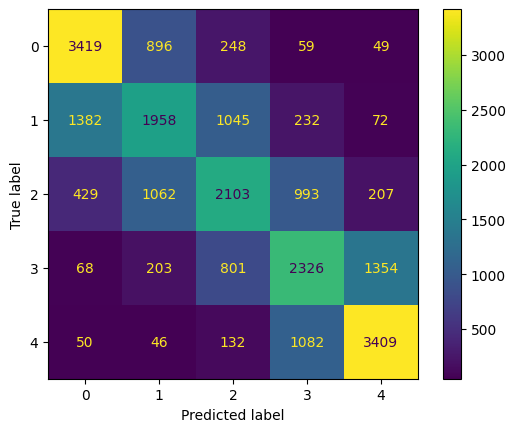

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [62]:
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.64      0.73      0.68      4671
           2       0.47      0.42      0.44      4689
           3       0.49      0.44      0.46      4794
           4       0.50      0.49      0.49      4752
           5       0.67      0.72      0.70      4719

    accuracy                           0.56     23625
   macro avg       0.55      0.56      0.55     23625
weighted avg       0.55      0.56      0.55     23625



In [38]:
# scores = cross_val_score(pipeline, X_try[:2000], y[:2000], scoring='roc_auc', cv=cv, n_jobs=-1)